# Artificial Neural Network (ANN) for Regression

### Importing the libraries

In [146]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

tf.__version__

'2.15.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [147]:
dataset = pd.read_excel("./filez/Folds5x2_pp.xlsx")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [148]:
dataset.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [149]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


### Splitting the dataset into the Training set and Test set

In [150]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Part 2 - Building the ANN
**Inputs neurons**:
- Temperature
- Pressure
- Humidity
- Vacuum

**Output neuron**:
- Energy output

### Initializing the ANN

In [151]:
# sequence of layers
ann = tf.keras.models.Sequential()

### Adding the hidden layers

In [152]:
# Dense layer (fully connected): each neuron in the layer is
# connected to every neuron in the preceding layer. 

# 1st layer
ann.add(tf.keras.layers.Dense(units=12, activation='relu', input_shape=(X_train.shape[1],)))

# 2nd layer
ann.add(tf.keras.layers.Dense(units=12, activation="relu"))

# 3rd layer
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

### Adding the output layer

In [153]:
# no sigmoid or softmax, as they are used for classification, not regression
# -> default value is `none`
ann.add(tf.keras.layers.Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

**optimizer**:
- Adam is a safe first choice due to its effectiveness in various scenarios 
  - Great general-purpose optimizer
- SGD can be more interpretable and easier to tune, and sometimes it achieves better generalization than Adam 
  - Ideal for simple models and problems where advanced optimizers like Adam provide no significant benefits.
- Adaptive Optimizers (like RMSprop, Adagrad, Adadelta) are particularly useful for problems with sparse data or for dealing with non-stationary objectives.
  - RMSprop: Often used when dealing with recurrent neural networks.
  - Adagrad: Good for dealing with sparse data.
  - Adadelta: Useful in situations where Adagrad runs into the problem of diminishing learning rates too quickly.
- Nadam can be used when we want to leverage the benefits of Nesterov momentum, which can lead to faster convergence in some cases.
    - Leverage the benefits of Nesterov momentum.

**loss**:
- MSE is a good default choice for many standard regression problems.
- MAE or Huber Loss can be preferable if your data contains outliers.
- Log-Cosh Loss can be a good choice if you want a smooth loss function.
- Quantile Loss is useful if you're interested in predicting a range instead of a single value.

In [154]:
# ann.compile(optimizer="adam", loss="mean_squared_error")
ann.compile(
    optimizer="adam",
    loss="mean_squared_error",
    metrics=["mae", tf.keras.metrics.RootMeanSquaredError()],
)

### Training the ANN model on the Training set

In [155]:
# ann.fit(X_train, y_train, batch_size = 32, epochs = 100)
ann.fit(X_train, y_train, batch_size = 32, epochs = 200, validation_split=0.1)

Epoch 1/200


216/216 [==============================] - 0s 914us/step - loss: 14431.8330 - mae: 88.3187 - root_mean_squared_error: 120.1326 - val_loss: 3478.7947 - val_mae: 56.6433 - val_root_mean_squared_error: 58.9813
Epoch 2/200
216/216 [==============================] - 0s 519us/step - loss: 4039.9258 - mae: 48.0165 - root_mean_squared_error: 63.5604 - val_loss: 4421.4829 - val_mae: 64.6602 - val_root_mean_squared_error: 66.4942
Epoch 3/200
216/216 [==============================] - 0s 528us/step - loss: 2968.1963 - mae: 40.3752 - root_mean_squared_error: 54.4812 - val_loss: 5226.3057 - val_mae: 70.7308 - val_root_mean_squared_error: 72.2932
Epoch 4/200
216/216 [==============================] - 0s 536us/step - loss: 2357.7126 - mae: 33.6353 - root_mean_squared_error: 48.5563 - val_loss: 5444.0576 - val_mae: 72.4074 - val_root_mean_squared_error: 73.7839
Epoch 5/200
216/216 [==============================] - 0s 555us/step - loss: 1699.3436 - mae: 26.6439 - root_mean_squared_error: 41.2231 - val

### Predicting the results of the Test set

In [156]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)
print('\n[prediction vs. actual]\n')
print(
    np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1)
)

60/60 [==============================] - 0s 422us/step

[prediction vs. actual]

[[349.39 431.23]
 [374.   460.01]
 [376.66 461.14]
 ...
 [382.62 473.26]
 [356.11 438.  ]
 [371.47 463.28]]


### Evaluating the Model

In [157]:
from sklearn.metrics import r2_score

test_loss, test_mae, test_rmse = ann.evaluate(X_test, y_test)

print(f"Test Loss (MSE): {test_loss:,.3f}")
print(f"Test MAE: {test_mae:,.3f}")
print(f"Test RMSE: {test_rmse:,.3f}")
print(f"Test R² Score: {r2_score(y_test, y_pred):,.3f}")

60/60 [==============================] - 0s 420us/step - loss: 7543.2759 - mae: 86.6563 - root_mean_squared_error: 86.8520
Test Loss (MSE): 7,543.276
Test MAE: 86.656
Test RMSE: 86.852
Test R² Score: -24.790


### Visualizing Model Performance

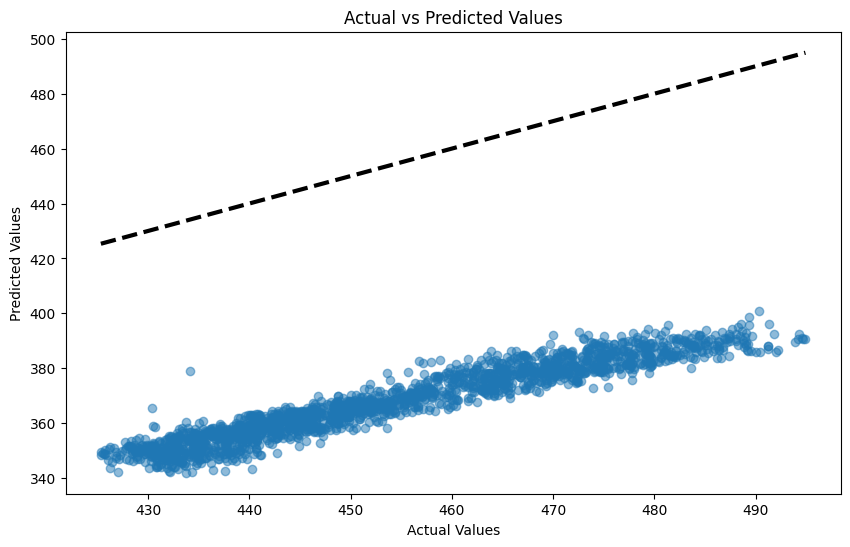

In [158]:
# Scatter plot -> Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.plot(
    [y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=3
)  # Ideal line
plt.show()



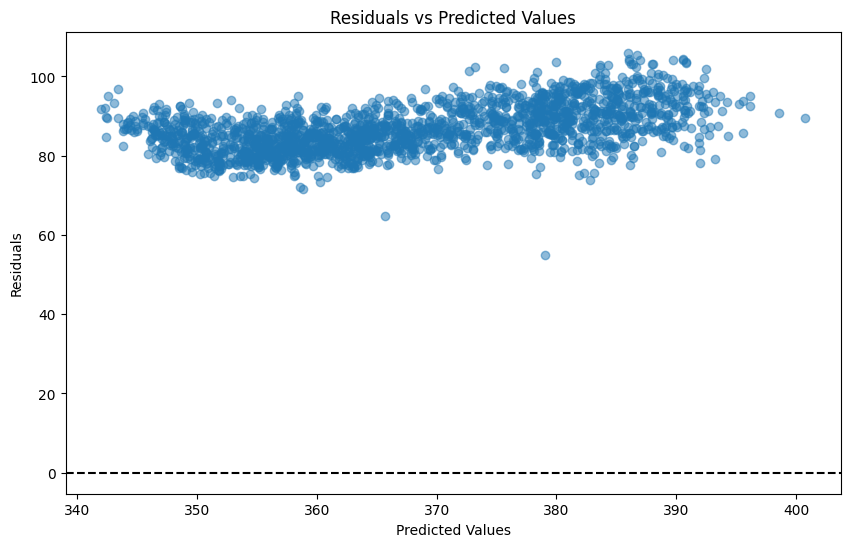

In [159]:
# Scatter plot -> Residual vs. Predicted
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color="k", linestyle="--")
plt.show()

    🧐 Non Neural Network models seem to have better performance (see ../02_regression->projec/06_summary.ipynb)